# Data scaping for the data set : Google Play Store Apps

Author: Lauren Gorst

Date: 08/09/23

### Contents:
- Section 1 : Data Collection (And Overview)
- Section 2 : Data Cleaning
- Section 3 : Data Visualisation
- Section 4 : Evaluation of insights and findings

#### Section 1: Data collection
Firstly it is important to make reference to details of the data specified in Kaggle. The data is extracted from two seperate cvs files pertaining to 10K playstore apps availible on the android market.

The data is extracted directly through jupyter notebook and for the most part both files will be treated seperately. Both files are realted in the sense that they make reference to the same instance of app data, however both contain differing information pertaining to the apps available. File "google_reviews.csv" lists the human readble text reviews of app users, also notably making this easy to analyse through assigned "Sentiment Polarity" and "Sentiment Subjectivity". The file "google_stats.csv" contains information pertaining to the apps genre, number of installs, version etc. 

This analysis will focus on the treatment of data for the purpose of android app market speculation making reference to useful insights that can be made from the given data, and speculating on those that could further be extrapolated upon with supplementary data.

##### Data Overview

To be able to view further data visualisations and analysis it is crucial to make sure your jupyter notebook supports the following libraries: 

In [141]:
# Numerical/Statistical imports:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns

# Necessary visual imports
import ipywidgets as widgets
from IPython.display import display
import panel as pn
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, Slope # Use also Band in case of wanting to add a confidence interval (Ultimately omitted)

In [143]:
# NOTE: Upon importing the CSV files into jupyter notebooks the file names were changed:

df1 = pd.read_csv('google_reviews.csv')
df2 = pd.read_csv('google_stats.csv')

# For the pupose of understanding the data set being treated

display(df1)
display(df2)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### Section 2: Data Cleaning

How we clean the data will depend on what we are processing. 
Situations we will consider:
- Need to omit data
- Need to replace values
- Need to convert Nan values to 0
- Duplicate Data
- Anomalies
- Treatment of Outliers

##### Missing Data:

In [146]:
# Check for missing data by column for each file seperately

def check_and_sum_missing(df):
    df.replace('Varies with device', np.nan, inplace=True)
    missing_data = df.isnull().sum()
    print(f"Missing Data per Column:")
    print(missing_data)
    total_missing = missing_data.sum()
    total_rows = len(df)
    print("\nTotal Missing Values:", total_missing)
    print("Total Rows in File:", total_rows,"\n")

# View above function
check_and_sum_missing(df1)
check_and_sum_missing(df2)

Missing Data per Column:
App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

Total Missing Values: 107457
Total Rows in File: 64295 

Missing Data per Column:
App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver       1467
Android Ver       1365
dtype: int64

Total Missing Values: 6003
Total Rows in File: 10841 



##### Null Data:

The use of heatmaps in the following section only seeks to demonstrate the scale of missing data within the data frames. Due to the lack of granularity it is not meant to serve as a locator for the missing data or give an indication as to exact size.

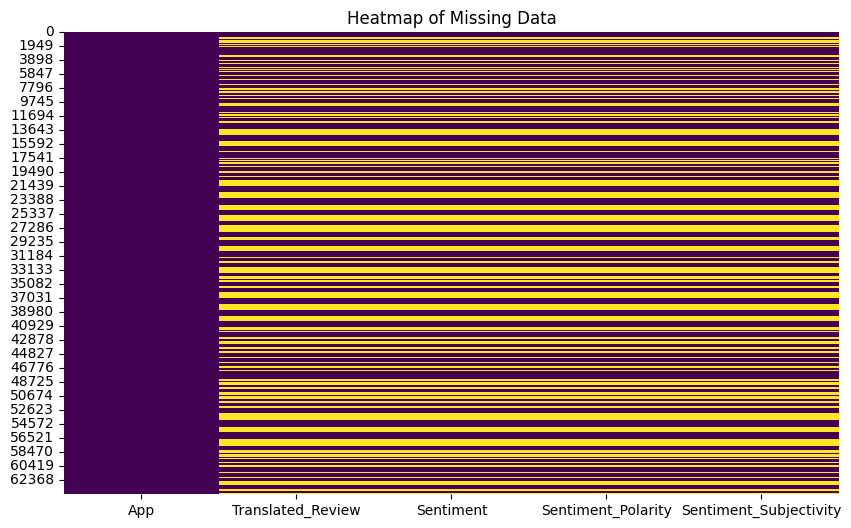

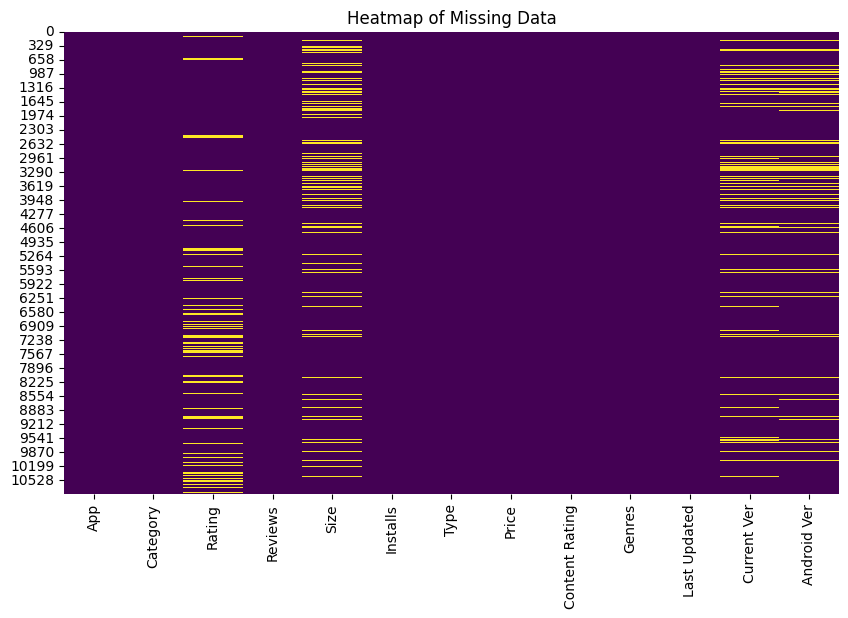

In [147]:


# this can be used for data cleaning when the value is null
def is_null_data_heat(df):
    df.replace('Varies with device', np.nan, inplace=True)
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
    plt.title('Heatmap of Missing Data')
    plt.show()

'''
Apart from granularity, the shortcoming of this is that some of our columns 
don't omit data purely through null
    - SIZE/CURRENT VERSION : "Varies with device"

From this reason we have replaced mentioned columns with a null value
'''
is_null_data_heat(df1)
is_null_data_heat(df2)

def is_null_data(df):
    no_nulls =df.replace('Varies with device', np.nan, inplace=True)
    return no_nulls
    
# Below is only an indication of the visual scale of missing calues 


Legend: the above figures use the respective data frame columns along the x-axis and row index along the y-axis to show the scale of missing data.

##### Data Anomalies

As it has been noted, the treatment od anomalies in data is also considered data cleaning. When processing the data from the data frame df2, it was noted that there was a category included labelled "1.9". This has been considered an anomaly due to the fact that it only contains a single entry and does not fit with the naming conventions of the remaining categories considred. 

In [7]:
# Filter rows where 'Category' is '1.9'

df2 = pd.read_csv('google_stats.csv')
def anomaly_df2(df):
    filtered_df = df[df['Category'] == '1.9']
    print(filtered_df)

# Display the filtered DataFrame

anomaly_df2(df2)

                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN  


##### Duplicated Data

Due to already large size of the data frames it is important to consider the possibility of duplicate data. In this instance we will remove data only for data frame 2 where multiple entries are observed for the same app which are clearly duplicate entries. 

In [63]:
# The original data set to be compared
num_rows_df2 = df2.shape[0]
print(f"The number of rows in the original dataset: {num_rows_df2}")

# Function to remove duplicated rows

def remove_duplicate_rows(df):
    
    # Group the data by the 'App' column and remove duplicates within each group
    removed_duplicates_df = df.groupby('App', as_index=False).first()
    num_rows = removed_duplicates_df.shape[0]
    print(f"The number of rows after duplicates removed: {num_rows}")
    return removed_duplicates_df 

# Call the function and compare the data frame before and after duplicate removal

removed_dup_df2 = remove_duplicate_rows(df2)
num_rows_removed_dup_df2 = removed_dup_df2.shape[0]
removed_duplicates = num_rows_df2 - num_rows_removed_dup_df2
print(f"Amount of removed duplicates: {removed_duplicates}")


The number of rows in the original dataset: 10841
The number of rows after duplicates removed: 9660
Amount of removed duplicates: 1181


For simplicity,cthe rest of this lab will use only completely cleaned data as was described above. These cleaned data frames will be refered to as: cleaned_df1 and cleaned_df2. More data cleaning examples will be used further on, but these will be case specific.

#### Cleaned Data Frame 1

In [109]:
cleaned_df1 = df1.replace('Varies with device', np.nan)

#### Cleaned Data Frame 2

In [150]:
# Remove anomaly category 

def remove_cat(df):
    # Remove rows with the specified category ('1.9')
    df = df[df['Category'] != '1.9']
    
    # Reset the index after removing rows (could be omitted if required)
    df.reset_index(drop=True, inplace=True)
    
    return df
    
removed_cat_df2 = remove_cat(df2)
removed_duplicates_df2 = removed_cat_df2.drop_duplicates(subset='App', keep='first')
cleaned_df2 = removed_duplicates_df2.replace('Varies with device', np.nan)


#### Section 3: Data Visualisations

In this section we will seek to make insightful visual analysis of both data frames mentioned and treated above. This will include tabular and graphical representations of the data. It is important to note that for the sake of this lab as many different formats will be used as possible even if they are not found to display statistically significant results. This point will be further extrapolated upon with the subsequent visualisations. 

In [72]:
# Group the data by 'Category' and count the number of apps in each category

category_counts = cleaned_df2['Category'].value_counts()

# Create a function to update the bar chart based on the sorting selection

def update_chart(sort_alphabetically):
    plt.figure(figsize=(10, 8))
    if sort_alphabetically:
        category_counts_sorted = category_counts.sort_index()
    else:
        category_counts_sorted = category_counts
    category_counts_sorted.plot(kind='barh')
    plt.xlabel('Number of Apps')
    plt.ylabel('Category')
    plt.title('Total Number of Apps by Category')
    plt.gca().invert_yaxis()  # Invert the y-axis to display the highest count at the top
    plt.show()

# Create an interactive widget for sorting

sort_checkbox = widgets.Checkbox(
    value=False,
    description='Sort Alphabetically',
    disabled=False,
    indent=False
)



widgets.interactive(update_chart, sort_alphabetically=sort_checkbox)



interactive(children=(Checkbox(value=False, description='Sort Alphabetically', indent=False), Output()), _dom_…

Legend (Figure 1): The bar chart can be ordered alphabetically using the interactive feature however in its original format it has ordered the data from highest to lowest with regards to the total number of apps availible by category.

What can be noted in the above graph is the stark difference in total app numbers offered by category. The Category Family has significantly more apps than the second largest category by app total Game. Lowest ranking categories include: Comics, Beauty. 

For the following graphique, we will explore another element of data cleaning not covered previously. Due to the fact that we will be dealing with integer values and operations, data from the data frame must be formatted to remove non-integer characters. 

In [151]:

# Remove the '+' character and convert 'Installs' values to integers
cleaned_df2['Installs'] = cleaned_df2['Installs'].replace(r'[+,]', '', regex=True).astype(int)


In [178]:
cleaned_df2['Installs'] = cleaned_df2['Installs'].replace(',', '').replace('+', '').astype(int)

# Group the data by 'Category' and find the app with the highest rating in each category
best_rated_apps = cleaned_df2.groupby('Category').apply(lambda group: group[group['Rating'] == group['Rating'].max()])

# Reset the index to remove the 'Category' index level 
#(Could be optional but we have chosen to explore this possibility)
best_rated_apps.reset_index(drop=True, inplace=True)

# Among the highest-rated apps in each category, find the one with the highest number of installs
best_performing_apps = best_rated_apps.groupby('Category').apply(lambda group: group[group['Installs'] == group['Installs'].max()])

# Reset the index of the final result
# (Again an optional consideration)
best_performing_apps.reset_index(drop=True, inplace=True)

# Sort the final DataFrame by 'Installs' for presentation
best_performing_apps.sort_values(by='Installs', ascending=False, inplace=True)

# Create a Panel DataFrame to display the table and use Tabulator extension

table = pn.widgets.DataFrame(best_performing_apps[['Category', 'App', 'Rating', 'Installs']], name='Best-Performing Apps')
pn.extension('tabulator')
title_widget = pn.pane.Markdown("## Best-Performing Apps by Category")
legend_widget = pn.pane.Markdown("Legend:\n"
                                 "Apps are ranked in order of total installs and rating. Rating is assessed from 1-5, with 5 being highest rated.")

layout = pn.Column(title_widget, legend_widget, table)
layout


Column
    [0] Markdown(str)
    [1] Markdown(str)
    [2] DataFrame(name='Best-Performing Apps', value=               Category   ...)

NOTE: The above table may cause some viewing issues due to the fact that it is displayed as a scroll window contained within a scroll window

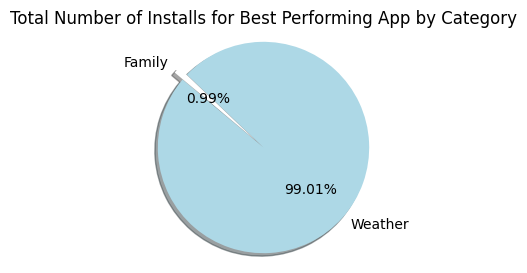

In [153]:
# Filter the DataFrame to get apps in the "Weather" and "Family" categories
weather_apps = best_performing_apps[best_performing_apps['Category'] == 'WEATHER']
family_apps = best_performing_apps[best_performing_apps['Category'] == 'FAMILY']

# Calculate the total installs for each category
total_installs_weather = weather_apps['Installs'].sum()
total_installs_family = family_apps['Installs'].sum()

# Input data for the pie chart
labels = ['Weather', 'Family']
sizes = [total_installs_weather, total_installs_family]
colors = ['lightblue', 'white']
explode = (0.1, 0)  # explode the 1st slice (i.e., 'Weather')

# Pie chart creation
plt.figure(figsize=(3, 3))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=140)
plt.title('Total Number of Installs for Best Performing App by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


Legend (Figure 2): The exact data can be viewed within the table "Best-Performing Apps by Category"

A Pie Chart was used in this instance to show the significant difference in the total number of installs for the most popular game of either category. This example demonstrates that even though weather has been shown to be grouped has having fewest available apps by category (figure1), it has the greatest amount of downloads by far for its most popular app as opposed to the category with the most amount of apps avaiblible where the most popular app of the category has significantly fewer downloads. 

The conclusion that we can draw from this is that lauching an app in either category would highlight a tough market breakthrough. In the case of launching an app in the Family catagory, the market saturation challenge a new apps ability to be noticed. In the case of launching an app in the weather category, it would face less copetition by volume, but well established apps such as "Weather forecast" are already proven competitors. 

##### TREATMENT OF OUTLIERS 

The below graph is an example of how outliers can be treated, this is another example of data cleaning specific to this example.

In [187]:


# Total number of apps in each category
total_apps_per_category = cleaned_df2.groupby('Category')['App'].count()

# Total installs in each category
total_installs_per_category = cleaned_df2.groupby('Category')['Installs'].sum()

# Function to remove outliers based on IQR
def remove_outliers_iqr(data_series):
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data_series[(data_series >= lower_bound) & (data_series <= upper_bound)]

# Remove outliers from 'total_installs_per_category'
total_installs_per_category = remove_outliers_iqr(total_installs_per_category)

# Filter 'total_apps_per_category' to have the same length as 'total_installs_per_category'
#(this caused problems otherwise with graphique)
total_apps_per_category = total_apps_per_category[total_apps_per_category.index.isin(total_installs_per_category.index)]


source = ColumnDataSource(data=dict(
    x=total_apps_per_category.values,
    y=total_installs_per_category.values,
    category=total_apps_per_category.index
))

# Create a hover tool
hover = HoverTool(
    tooltips=[
        ("Category", "@category"),
        ("Total Number of Apps", "@x"),
        ("Total Installs", "@y"),
    ]
)

# Bokeh figure
p = figure(
    title='Total Number of Installs by Total Number of Apps by Category)',
    x_axis_label='Total Number of Apps',
    y_axis_label='Total Number of Installs',
    tools=[hover, 'pan', 'box_zoom', 'wheel_zoom', 'reset'],
)

# Scatter plot
scatter = p.scatter(x='x', y='y', source=source, size=10, alpha=0.7)

# Trendline
z = np.polyfit(total_apps_per_category, total_installs_per_category, 1)
p_line = Slope(gradient=z[0], y_intercept=z[1], line_color="red", line_width=2)
p.add_layout(p_line)

# Calculate R-squared manually (installing scipi would have made this easier)
y_pred = np.polyval(z, total_apps_per_category)
y_mean = total_installs_per_category.mean()
ssr = ((y_pred - y_mean) ** 2).sum()
sse = ((total_installs_per_category - y_mean) ** 2).sum()
r_squared = ssr / sse
print(f"R-squared: {r_squared}")

# Display the plot in a Jupyter Notebook
output_notebook()
show(p)


# Higher R squared denotes a better fit to the trend line 


R-squared: 0.1873046865631581


Loading BokehJS ...

Legend (Figure 4): Total Installs graphed against total number of apps availabe, each data point represents the average of each by category.

NOTE: The R squred value denotes how closely the data values match the trend line. A higher R squared denotes a closer fit. In the above case we chose tpo remove outliers in the data giving us a trend line with an R squared value of R-squared = 0.19 (2 sig.fig). Prior to removing the outliers, the trendline for our data gave us an R squared value of R-squared: 0.27 (2 sig.fig). This would imply that removing the outliers gave us data that did not fit the use of a trend line as well. 

Something that we should note however, is that in either case, our R- squared values are NOT statistically significant. In fact to be considered statistically significant they would have to fall within the range of 0.50 to 0.99. Therefore in this instance a trendline is somewhat redundant however it will be included to demonstrate the trend that might ordinarily be expected when considering our data. ie the notion that having more apps in a given catagory would also increase the total number of installs.

It should also be remarked that producing the same graph but instead substituting the values for "Total Number of Intsalls" with "Average Number of Installs" on the y axis, would produce a graph with trendline having R-squared: 0.02353063950169265, therefore being even less statistically significant. 

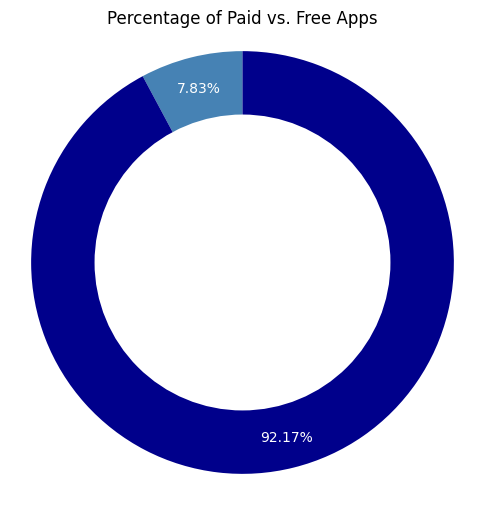

In [103]:
# Calculate the percentage of paid and free apps
total_apps = len(cleaned_df2)
total_paid_apps = len(cleaned_df2[cleaned_df2['Type'] == 'Paid'])
total_free_apps = len(cleaned_df2[cleaned_df2['Type'] == 'Free'])
percentage_paid = (total_paid_apps / total_apps) * 100
percentage_free = (total_free_apps / total_apps) * 100

# Data
labels = ['Paid', 'Free']
sizes = [percentage_paid, percentage_free]
colors = ['steelblue', 'darkblue']

# Pie chart for the inner circle
plt.figure(figsize=(6, 6))
plt.pie([100], colors=['white'], radius=0.5)

# Pie chart for the outer circle (paid and free apps)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90, pctdistance=0.85, textprops={'color': 'white'})

# Draw a white circle in the center to make it a doughnut chart (can change size)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Title
plt.title('Percentage of Paid vs. Free Apps')

# Make sure its a circle not a blob
plt.axis('equal')

# Show the doughnut chart
plt.show()


Legend (Figure 5): Doughnut chart showing the ratio of free to paid apps as a percentage

This shows us that the vast majorits of apps offered are indeed free. Baring this in mind, would we expect most reviews to be positive due to not having to purchase the app... or could it skew opinions in a negative direction due to poor quality resulting from a focus on quantity. 

#### Section 4: Data Insights (Is like marmite...?)

The following section seeks to look at one aspect of the data frame 1 in particular. The purpose of this is that it is directly responsible for understanding user interaction with the app. This information is crucial for a prospective developer as it assessess an apps success amoug its users which explains the use of multiple different visualisation methods for the same data.

/Users/laurengorst/titanic_dashboard/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/laurengorst/titanic_dashboard/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/laurengorst/titanic_dashboard/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/laurengorst/titanic_dashboard/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed i

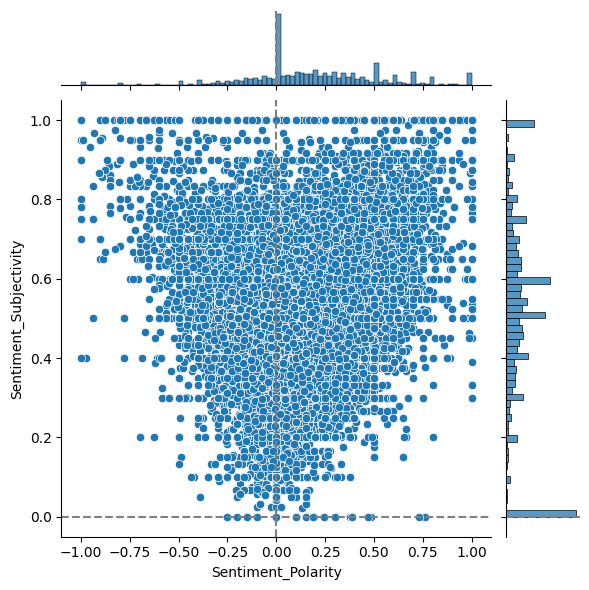

In [182]:
g = sns.JointGrid(data=cleaned_df1, x="Sentiment_Polarity", y="Sentiment_Subjectivity")

# Plot the scatterplot and histograms
g.plot(sns.scatterplot, sns.histplot)

# Add a reference line (you can adjust the values accordingly)
g.refline(x=0, y=0)

# Show the plot
plt.show()


Legend (Figure 5): joint Grid graphs showing how density of data can be interpreted for a huge data set with no observable trend using the scatter plot method.

Although the use of this graph does demonstrate the distribution and density of both sentiment subjectivity and sentiment polarity in a way that is observable, a clearer way to do this would be to take the average of the data and use a kernel distributin estimate as follows.

/Users/laurengorst/titanic_dashboard/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/laurengorst/titanic_dashboard/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/laurengorst/titanic_dashboard/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/laurengorst/titanic_dashboard/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

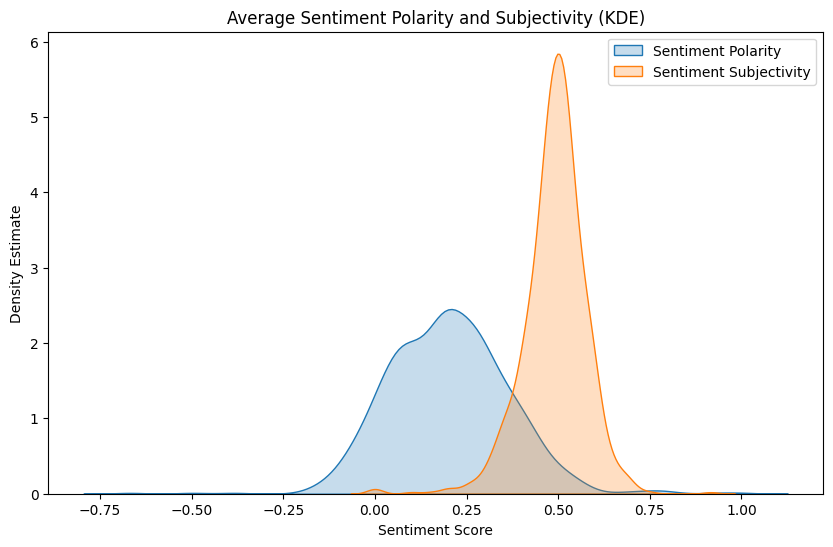

In [116]:
#data cleaning: 
# Replace infinite values with NaN in 'Sentiment_Polarity' and 'Sentiment_Subjectivity'
cleaned_df1['Sentiment_Polarity'] = np.where(np.isinf(cleaned_df1['Sentiment_Polarity']), np.nan, cleaned_df1['Sentiment_Polarity'])
cleaned_df1['Sentiment_Subjectivity'] = np.where(np.isinf(cleaned_df1['Sentiment_Subjectivity']), np.nan, cleaned_df1['Sentiment_Subjectivity'])

# Group data by 'App' and calculate the average Sentiment_Polarity and Sentiment_Subjectivity
grouped_data = cleaned_df1.groupby('App').agg({'Sentiment_Polarity': 'mean', 'Sentiment_Subjectivity': 'mean'})


plt.figure(figsize=(10, 6))

# KDE plots for Sentiment_Polarity and Sentiment_Subjectivity
sns.kdeplot(grouped_data['Sentiment_Polarity'], label='Sentiment Polarity', fill=True)
sns.kdeplot(grouped_data['Sentiment_Subjectivity'], label='Sentiment Subjectivity', fill=True)

# Label and legend
plt.xlabel('Sentiment Score')
plt.ylabel('Density Estimate')  # Adjust the y-axis label
plt.title('Average Sentiment Polarity and Subjectivity (KDE)')
plt.legend()


plt.show()


Legend (Figure 6): Graph showing distinct peaks for sentiment polarity and subjectivity using kernel density estimate.

Normally a KDE shows ranges less than 1. The data could be normalised to achieve this however in this case, the data doesn't work well with the use of this normalisation. 

What the above graphs show us is that we have an even spread of reviews, denoting an even data spread across sentiment polarity and peoples' subjective opinions of the apps: sentiment polarity is a float spanning [-1,1], sentiment subjectivity is measured from [0,1]. 

What could be remarked however is that sentiment polarity is more evenly distributed over a larger sprread than sentiment subjectivity. This means that the data was more polar (ie less concentrated at a certain point) than the data for subjectivity.  



Below is a graph showing identical data however it isn't a KDE (kernel density estimate). Instead it uses frequency along the y-axis which is the count of the apps for the given sentiment score accorss polarity and subjectivity. I have included it in the case of preference.  

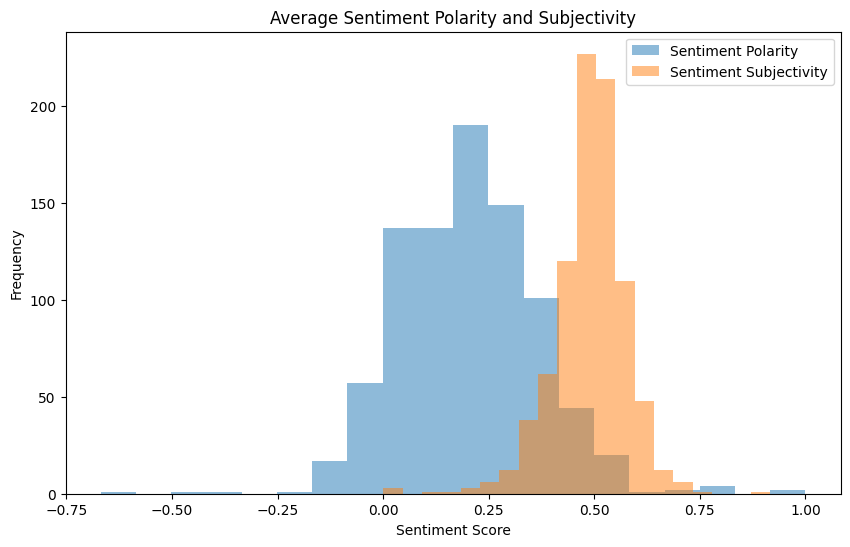

In [110]:

# Group data by 'App' and calculate the average Sentiment_Polarity and Sentiment_Subjectivity
grouped_data = cleaned_df1.groupby('App').agg({'Sentiment_Polarity': 'mean', 'Sentiment_Subjectivity': 'mean'})

# Create a new figure
plt.figure(figsize=(10, 6))

# Create histograms for Sentiment_Polarity and Sentiment_Subjectivity
plt.hist(grouped_data['Sentiment_Polarity'], bins=20, alpha=0.5, label='Sentiment Polarity')
plt.hist(grouped_data['Sentiment_Subjectivity'], bins=20, alpha=0.5, label='Sentiment Subjectivity')

# Add labels and a legend
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Average Sentiment Polarity and Subjectivity')
plt.legend()

# Show the plot
plt.show()


Legend (Figure 7): Frequency (total sum of values) within the given range of sentiment score

Using frequency there is no discussion as to whether the distribution should be normalised whichis why it has been included even though it parallels the discoveries made in figure 6.


##### Important

the difference between visualising data using figure 5 and figures 6 and 7, is that in figure 5 we can see with more granularity where the data is most concentrated within a smaller range. It allows us to see this thanks to the peaks in joined bar chart which don't seek to even out the distribution visually. The benefit to using figures 6 and 7 is that data is displayed in a more visually simplistic way which is appropriate for the scope of this investigation. 

#### Section 4: Evaluation of Insights and Findings

The next section will seek to show how the two files are connected by certain data regions. It will also discuss findings and suggest further insights that could be conducted should the data provided become more complete.

If we want to find the app with the most written reviews for data frame 1 we can do so as follows:

In [111]:
app_review_counts = cleaned_df1.groupby('App').size().reset_index(name='Review_Count')

# Find the app with the highest number of reviews
app_with_most_reviews = app_review_counts.loc[app_review_counts['Review_Count'].idxmax()]

# Print the result
print("App with the Highest Number of Reviews:")
print("App:", app_with_most_reviews['App'])
print("Number of Reviews:", app_with_most_reviews['Review_Count'])


App with the Highest Number of Reviews:
App: Angry Birds Classic
Number of Reviews: 320


Knowing this, we can use data frame 2 to find out how many userd left a written review as opposed to those who did not. Since both data frames are connected by the app title, we can search data frame 2 using this information. 

In [112]:
angry_birds_classic = cleaned_df2[cleaned_df2['App'] == 'Angry Birds Classic']

if not angry_birds_classic.empty:
    # Print information about "Angry Birds Classic"
    print("Information about 'Angry Birds Classic':")
    print(angry_birds_classic)
else:
    print("No entry found for 'Angry Birds Classic' in the dataset.")


Information about 'Angry Birds Classic':
                      App Category  Rating  Reviews Size   Installs  Type  \
1680  Angry Birds Classic     GAME     4.4  5566669  97M  100000000  Free   

     Price Content Rating  Genres  Last Updated Current Ver Android Ver  
1680     0       Everyone  Arcade  May 24, 2018       7.9.3  4.1 and up  


prior to cleaning the above data we would have found multiple duplicate entries:

In [113]:
angry_birds_classic = df2[df2['App'] == 'Angry Birds Classic']

if not angry_birds_classic.empty:
    # Print information about "Angry Birds Classic"
    print("Information about 'Angry Birds Classic':")
    print(angry_birds_classic)
else:
    print("No entry found for 'Angry Birds Classic' in the dataset.")

Information about 'Angry Birds Classic':
                      App Category  Rating  Reviews Size      Installs  Type  \
1680  Angry Birds Classic     GAME     4.4  5566669  97M  100,000,000+  Free   
1740  Angry Birds Classic     GAME     4.4  5566805  97M  100,000,000+  Free   
1905  Angry Birds Classic     GAME     4.4  5566889  97M  100,000,000+  Free   
1990  Angry Birds Classic     GAME     4.4  5566908  97M  100,000,000+  Free   
3883  Angry Birds Classic     GAME     4.4  5565856  97M  100,000,000+  Free   

     Price Content Rating  Genres  Last Updated Current Ver Android Ver  
1680     0       Everyone  Arcade  May 24, 2018       7.9.3  4.1 and up  
1740     0       Everyone  Arcade  May 24, 2018       7.9.3  4.1 and up  
1905     0       Everyone  Arcade  May 24, 2018       7.9.3  4.1 and up  
1990     0       Everyone  Arcade  May 24, 2018       7.9.3  4.1 and up  
3883     0       Everyone  Arcade  May 24, 2018       7.9.3  4.1 and up  


Note that in the above we chose to keep the app that appears first by index for simplicity. If we wanted to keep the the app instead having the most reviews we could do so by first grouping the data by app then reviews. This method is trivial and will be ignored in this instance. 

To compare these findings we can simply do as follows:

In [174]:
app_name = "Angry Birds Classic"

# Filter to select rows for the specific app
filtered_df1 = cleaned_df1[cleaned_df1['App'] == app_name]
filtered_df2 = cleaned_df2[cleaned_df2['App'] == app_name]

reviews_count_df1 = len(filtered_df1)
reviews_count_df2 = filtered_df2['Reviews'].iloc[0]  
as_percent = (int(reviews_count_df1) / int(reviews_count_df2)) * 100

as_percent_rounded = round(as_percent, 2)
print(f"The number of reviews for '{app_name}' is {reviews_count_df1} for df1 and {reviews_count_df2} for df2.")
print(f"Only {as_percent_rounded}% of users who left a review, left a written review.")

The number of reviews for 'Angry Birds Classic' is 320 for df1 and 5566669 for df2.
Only 0.01% of users who left a review, left a written review.


##### Further Insights

So far the data has been used to the best of my ability to produce insights into the current android app market. There are many important considerations that have not however been considered due the the data (or lack of data) avaiblible. Important insights that have yet to be made could pertain to : 
- Given that catagories are already highly saturated, in what genre would we be likely to see the greatest success?
- What is the most common user feedback (feature requests / trouble shooting) ?
- Does android version correlate to  a reviews sentiment polarity?
- What is the retention of users like for apps within a given category?

These insights and more would be useful to consider when launching an app but are difficult to assess with the given data, we would need additional data supplements to be able to draw insightful conclusions. 

#### References

Google Play Store Apps: https://www.kaggle.com/lava18/google-play-store-apps